Pitcher:  pass
Start Date:  pass
End Date:  pass


Gathering player lookup table. This may take a moment.
Gathering Player Data


                 release_speed  release_spin_rate
pitch_name                                       
4-Seam Fastball          100.0             2433.0
Changeup                  92.0             1601.0
Curveball                 83.0             2720.0
Slider                    91.0             2623.0




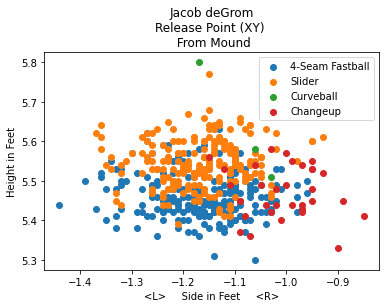

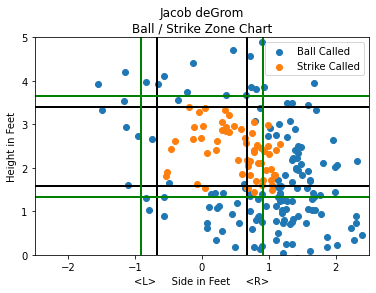

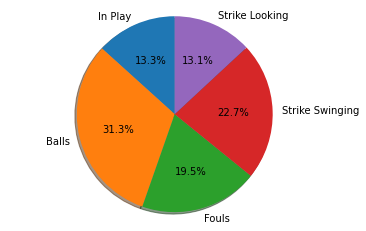

In [62]:
#######################################
# Pandas import and settings
import pandas as pd
pd.set_option('display.max_columns', None)

# matplotlib inport
import matplotlib.pyplot as plt

# baseball scraper import
import baseball_scraper as bs
from baseball_scraper import statcast
from baseball_scraper import playerid_lookup
from baseball_scraper import statcast_pitcher


#######################################
# coloumn names for simplicity sake
# find a better way to do this
pitcher = 'player_name'
tagged = 'pitch_name'
velo = 'release_speed'
spin = 'release_spin_rate'
rel_side = 'release_pos_x'
rel_height = 'release_pos_z'
plate_x = 'plate_x'
plate_z = 'plate_z'
pitch_call = 'description'

# select pitcher and timeframe for analysis
full_name = input('Pitcher: ')
start_date = input('Start Date: ')
end_date = input('End Date: ')

### shortcut because im lazy in testing ###
### make sure to remove this once you are done ###
if full_name == 'pass':
    full_name = 'Jacob deGrom'
if start_date == 'pass':
    start_date = '2021-06-01'
if end_date == 'pass':
    end_date = '2021-07-01'
    
# create first and last name from input full name
first_name = full_name.split()[0]
last_name =full_name.split()[-1]

# run the baseball_scraper to create the data frame & save as DF
key_id = int(playerid_lookup(last_name, first_name)['key_mlbam'])
df = statcast_pitcher(start_date, end_date, key_id)

# Create summary statistics
summary_stats = round(df.groupby([tagged])[[velo, spin]].mean())
print('\n ========== \n')
print(summary_stats)

##### Release Point plot #####
print('\n ========== \n')
# consider using 2*2 plot instead of one large plot?
df_pitches = df[tagged].unique().tolist()
for pitch in df_pitches:
    rel_pitch = df[df[tagged].str.contains(pitch)]
    plt.scatter(rel_pitch[rel_side], rel_pitch[rel_height], label=pitch)
    plt.xlabel('<L>     Side in Feet     <R>')
    plt.ylabel('Height in Feet')
    plt.title(full_name + '\nRelease Point (XY) \n From Mound')
    plt.legend()
plt.show()

##### Strike Zone #####
print('\n ========== \n')
# Dateframe of ball and strike
frame = df[[plate_x, plate_z, pitch_call]]
df_ball = frame[frame[pitch_call].str.contains('ball')]
df_strike = frame[frame[pitch_call].str.contains('called_strike')]

# Plt balls and strikes
plt.scatter(df_ball[plate_x], df_ball[plate_z], label='Ball Called')
plt.scatter(df_strike[plate_x], df_strike[plate_z], label='Strike Called')

# Set average stike zone top and bottom
top_zone_avg = df['sz_top'].mean()
bot_zone_avg = df['sz_bot'].mean()

# Create strike zone
plt.axhline(y=bot_zone_avg, linewidth=2, color='k')
plt.axhline(y=top_zone_avg, linewidth=2, color='k')
plt.axvline(x=(2/3), linewidth=2, color='k')
plt.axvline(x=(-2/3), linewidth=2, color='k')

# create "generous strike zone"
tolerance = 0.25
plt.axhline(y=bot_zone_avg-tolerance, linewidth=2, color='g')
plt.axhline(y=top_zone_avg+tolerance, linewidth=2, color='g')
plt.axvline(x=(2/3)+tolerance, linewidth=2, color='g')
plt.axvline(x=(-2/3)-tolerance, linewidth=2, color='g')

# Set criteria for plot
plt.title(full_name + '\nBall / Strike Zone Chart')
plt.xlabel('<L>     Side in Feet     <R>')
plt.ylabel('Height in Feet')
plt.xlim([-2.5, 2.5])
plt.ylim([0, 5]) 
plt.legend()
plt.show()

##### Pie Chart #####
print('\n ========== \n')
# list of each result type 
in_play_list = ['hit_into_play']
balls_list = ['ball', 'blocked_ball']
fouls_list = ['foul', 'foul_bunt', 'foul_tip']
s_swing_list = ['swinging_strike', 'missed_bunt', 'swinging_strike_blocked']
s_look_list = ['called_strike']

# dataframe of each pitch type
df_in_play = df[df[pitch_call].isin(in_play_list)]
df_balls = df[df[pitch_call].isin(balls_list)]
df_fouls = df[df[pitch_call].isin(fouls_list)]
df_s_swing = df[df[pitch_call].isin(s_swing_list)]
df_s_look = df[df[pitch_call].isin(s_look_list)]

# number of result type
in_play = len(df_in_play[pitch_call])
balls = len(df_balls[pitch_call])
fouls = len(df_fouls[pitch_call])
s_swing = len(df_s_swing[pitch_call])
s_look = len(df_s_look[pitch_call])

# Create Pie Chart
labels = 'In Play', 'Balls', 'Fouls', 'Strike Swinging', 'Strike Looking'
sizes = [in_play, balls, fouls, s_swing, s_look]
explode = (0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()